In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [6]:
df = pd.read_csv('heart.csv')
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

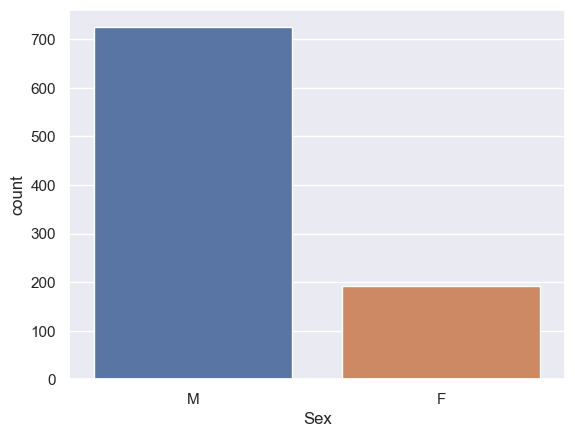

In [8]:
sns.countplot(x='Sex',data=df)
plt.show()

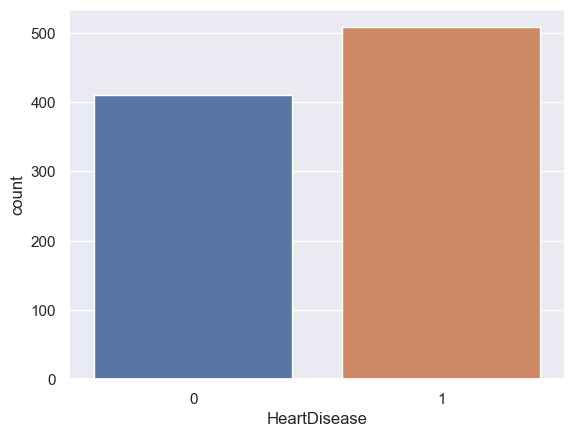

In [9]:
sns.countplot(x='HeartDisease',data=df)
plt.show()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
df['Sex'] = df['Sex'].map({"M":0,'F':1})
df.head()

Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   40    0           ATA        140          289          0     Normal   
1   49    1           NAP        160          180          0     Normal   
2   37    0           ATA        130          283          0         ST   
3   48    1           ASY        138          214          0     Normal   
4   54    0           NAP        150          195          0     Normal   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172              N      0.0       Up             0  
1    156              N      1.0     Flat             1  
2     98              N      0.0       Up             0  
3    108              Y      1.5     Flat             1  
4    122              N      0.0       Up             0

In [15]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [16]:
df['RestingECG'] = df['RestingECG'].map({'Normal':0,'LVH':1,'ST':2})
df.head()

Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0           ATA        140          289          0           0   
1   49    1           NAP        160          180          0           0   
2   37    0           ATA        130          283          0           2   
3   48    1           ASY        138          214          0           0   
4   54    0           NAP        150          195          0           0   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172              N      0.0       Up             0  
1    156              N      1.0     Flat             1  
2     98              N      0.0       Up             0  
3    108              Y      1.5     Flat             1  
4    122              N      0.0       Up             0

In [17]:
df['ExerciseAngina'].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [18]:
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N':0,'Y':1})
df.head()

Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0           ATA        140          289          0           0   
1   49    1           NAP        160          180          0           0   
2   37    0           ATA        130          283          0           2   
3   48    1           ASY        138          214          0           0   
4   54    0           NAP        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172               0      0.0       Up             0  
1    156               0      1.0     Flat             1  
2     98               0      0.0       Up             0  
3    108               1      1.5     Flat             1  
4    122               0      0.0       Up             0

In [19]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [20]:
df['ST_Slope'] = df['ST_Slope'].map({'Flat':0,'Up':1,'Down':2})
df.head()

Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0           ATA        140          289          0           0   
1   49    1           NAP        160          180          0           0   
2   37    0           ATA        130          283          0           2   
3   48    1           ASY        138          214          0           0   
4   54    0           NAP        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         1             0  
1    156               0      1.0         0             1  
2     98               0      0.0         1             0  
3    108               1      1.5         0             1  
4    122               0      0.0         1             0

In [22]:
dummies = pd.get_dummies(df,drop_first=True)
dummies

Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0     40    0        140          289          0           0    172   
1     49    1        160          180          0           0    156   
2     37    0        130          283          0           2     98   
3     48    1        138          214          0           0    108   
4     54    0        150          195          0           0    122   
..   ...  ...        ...          ...        ...         ...    ...   
913   45    0        110          264          0           0    132   
914   68    0        144          193          1           0    141   
915   57    0        130          131          0           0    115   
916   57    1        130          236          0           1    174   
917   38    0        138          175          0           0    173   

     ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  ChestPainType_ATA  \
0                 0      0.0         1             0                  1   
1                 0      1.0         0             1                  0   
2                 0      0.0         1             0                  1   
3                 1      1.5         0             1                  0   
4                 0      0.0         1             0                  0   
..              ...      ...       ...           ...                ...   
913               0      1.2         0             1                  0   
914               0      3.4         0             1                  0   
915               1      1.2         0             1                  0   
916               0      0.0         0             1                  1   
917               0      0.0         1             0                  0   

     ChestPainType_NAP  ChestPainType_TA  
0                    0                 0  
1                    1                 0  
2                    0                 0  
3                    0                 0  
4                    1                 0  
..                 ...               ...  
913                  0                 1  
914                  0                 0  
915                  0                 0  
916                  0                 0  
917                  1                 0  

[918 rows x 14 columns]

In [24]:
df.describe()

Age         Sex   RestingBP  Cholesterol   FastingBS  \
count  918.000000  918.000000  918.000000   918.000000  918.000000   
mean    53.510893    0.210240  132.396514   198.799564    0.233115   
std      9.432617    0.407701   18.514154   109.384145    0.423046   
min     28.000000    0.000000    0.000000     0.000000    0.000000   
25%     47.000000    0.000000  120.000000   173.250000    0.000000   
50%     54.000000    0.000000  130.000000   223.000000    0.000000   
75%     60.000000    0.000000  140.000000   267.000000    0.000000   
max     77.000000    1.000000  200.000000   603.000000    1.000000   

       RestingECG       MaxHR  ExerciseAngina     Oldpeak    ST_Slope  \
count  918.000000  918.000000      918.000000  918.000000  918.000000   
mean     0.592593  136.809368        0.404139    0.887364    0.567538   
std      0.793670   25.460334        0.490992    1.066570    0.618959   
min      0.000000   60.000000        0.000000   -2.600000    0.000000   
25%      0.000000  120.000000        0.000000    0.000000    0.000000   
50%      0.000000  138.000000        0.000000    0.600000    0.000000   
75%      1.000000  156.000000        1.000000    1.500000    1.000000   
max      2.000000  202.000000        1.000000    6.200000    2.000000   

       HeartDisease  
count    918.000000  
mean       0.553377  
std        0.497414  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

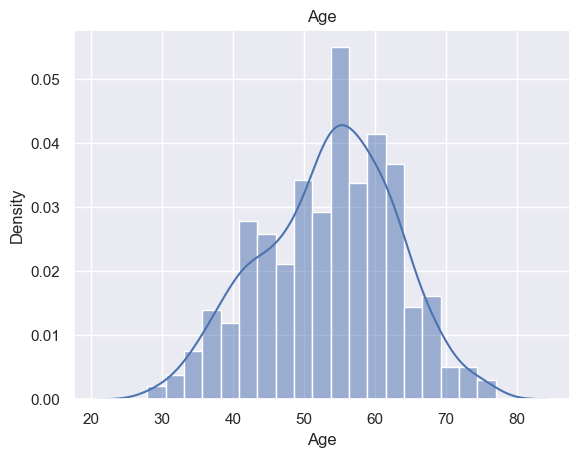

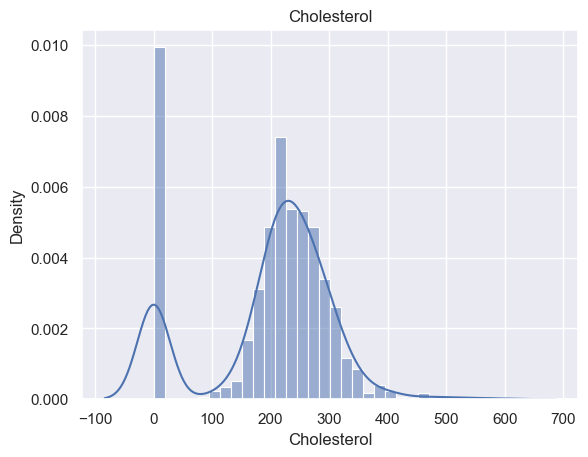

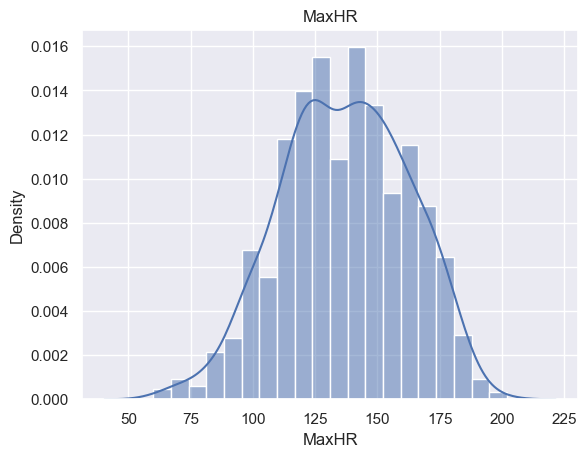

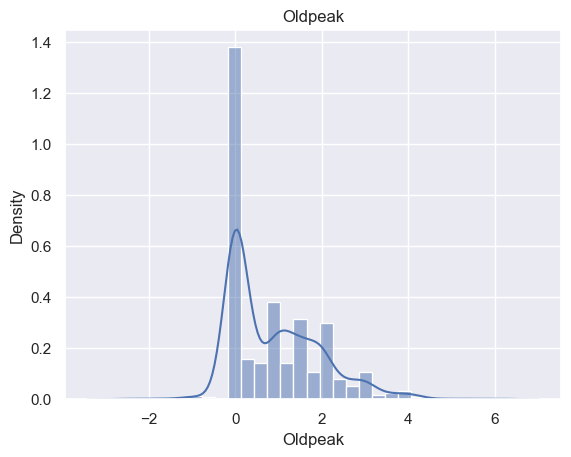

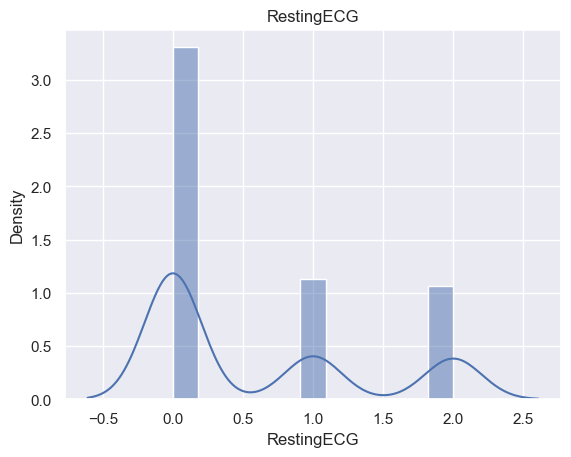

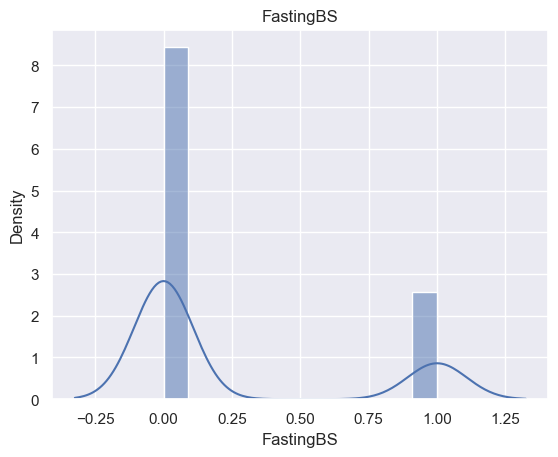

In [32]:
c = ['Age','Cholesterol','MaxHR','Oldpeak','RestingECG','FastingBS']
for i in c:
    plt.title(i)
    sns.histplot(df[i],kde=True,stat='density',kde_kws=dict(cut=3))
    plt.show()

In [152]:
df1 = dummies.copy()

In [153]:
df1.describe()

Age         Sex   RestingBP  Cholesterol   FastingBS  \
count  918.000000  918.000000  918.000000   918.000000  918.000000   
mean    53.510893    0.210240  132.396514   198.799564    0.233115   
std      9.432617    0.407701   18.514154   109.384145    0.423046   
min     28.000000    0.000000    0.000000     0.000000    0.000000   
25%     47.000000    0.000000  120.000000   173.250000    0.000000   
50%     54.000000    0.000000  130.000000   223.000000    0.000000   
75%     60.000000    0.000000  140.000000   267.000000    0.000000   
max     77.000000    1.000000  200.000000   603.000000    1.000000   

       RestingECG       MaxHR  ExerciseAngina     Oldpeak    ST_Slope  \
count  918.000000  918.000000      918.000000  918.000000  918.000000   
mean     0.592593  136.809368        0.404139    0.887364    0.567538   
std      0.793670   25.460334        0.490992    1.066570    0.618959   
min      0.000000   60.000000        0.000000   -2.600000    0.000000   
25%      0.000000  120.000000        0.000000    0.000000    0.000000   
50%      0.000000  138.000000        0.000000    0.600000    0.000000   
75%      1.000000  156.000000        1.000000    1.500000    1.000000   
max      2.000000  202.000000        1.000000    6.200000    2.000000   

       HeartDisease  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  
count    918.000000         918.000000         918.000000        918.000000  
mean       0.553377           0.188453           0.221133          0.050109  
std        0.497414           0.391287           0.415236          0.218289  
min        0.000000           0.000000           0.000000          0.000000  
25%        0.000000           0.000000           0.000000          0.000000  
50%        1.000000           0.000000           0.000000          0.000000  
75%        1.000000           0.000000           0.000000          0.000000  
max        1.000000           1.000000           1.000000          1.000000

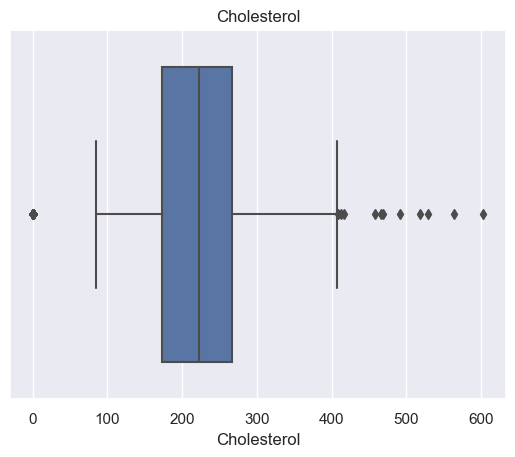

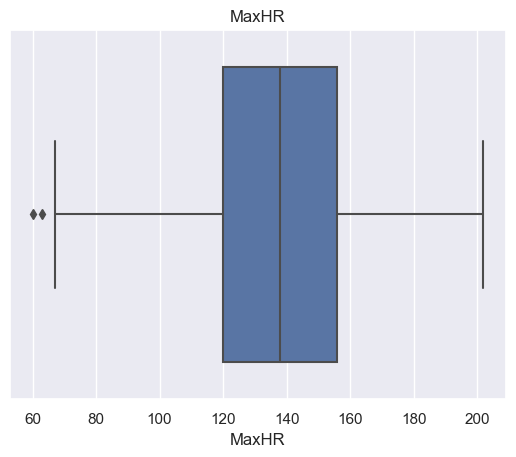

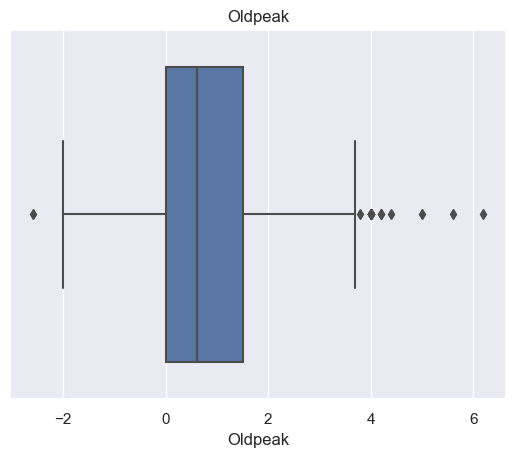

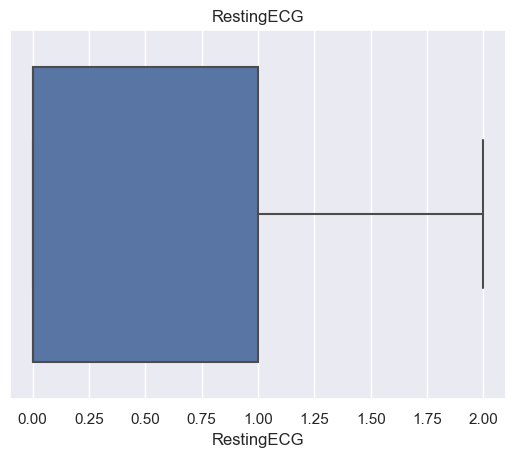

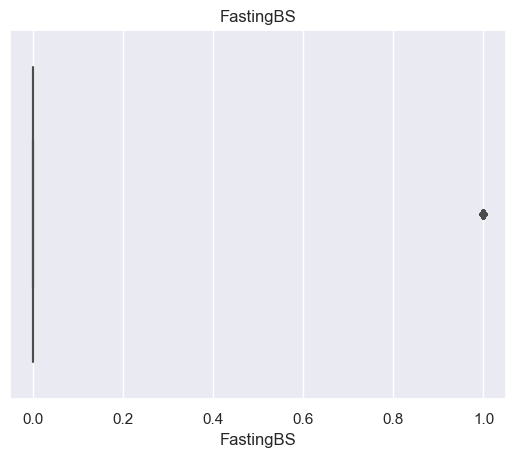

In [154]:
bxp = ['Cholesterol','MaxHR','Oldpeak','RestingECG','FastingBS']
for i in bxp:
    sns.boxplot(x=i,data=df1)
    plt.title(i)
    plt.show()

In [155]:
outliers = ['Cholesterol','MaxHR','Oldpeak','RestingECG','FastingBS']
for i in outliers:
    df1['z_score_'+i] = (df1[i] - df1[i].mean())/df1[i].std()
    df1 = df1[(df1['z_score_'+i] > -3) & (df1['z_score_'+i] < 3)]
df1.shape

(907, 19)

In [156]:
df1.describe()

Age         Sex   RestingBP  Cholesterol   FastingBS  \
count  907.000000  907.000000  907.000000   907.000000  907.000000   
mean    53.514884    0.210584  132.375965   197.689085    0.233738   
std      9.440095    0.407949   18.478160   107.418866    0.423441   
min     28.000000    0.000000    0.000000     0.000000    0.000000   
25%     47.000000    0.000000  120.000000   173.500000    0.000000   
50%     54.000000    0.000000  130.000000   222.000000    0.000000   
75%     60.000000    0.000000  140.000000   266.000000    0.000000   
max     77.000000    1.000000  200.000000   518.000000    1.000000   

       RestingECG       MaxHR  ExerciseAngina     Oldpeak    ST_Slope  \
count  907.000000  907.000000      907.000000  907.000000  907.000000   
mean     0.589857  136.912900        0.404631    0.865491    0.565601   
std      0.792784   25.448258        0.491091    1.011430    0.613360   
min      0.000000   63.000000        0.000000   -2.000000    0.000000   
25%      0.000000  120.000000        0.000000    0.000000    0.000000   
50%      0.000000  138.000000        0.000000    0.500000    1.000000   
75%      1.000000  156.000000        1.000000    1.500000    1.000000   
max      2.000000  202.000000        1.000000    4.000000    2.000000   

       HeartDisease  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
count    907.000000         907.000000         907.000000        907.000000   
mean       0.550165           0.190739           0.222712          0.049614   
std        0.497752           0.393100           0.416296          0.217266   
min        0.000000           0.000000           0.000000          0.000000   
25%        0.000000           0.000000           0.000000          0.000000   
50%        1.000000           0.000000           0.000000          0.000000   
75%        1.000000           0.000000           0.000000          0.000000   
max        1.000000           1.000000           1.000000          1.000000   

       z_score_Cholesterol  z_score_MaxHR  z_score_Oldpeak  \
count           907.000000     907.000000       907.000000   
mean             -0.010152       0.004258        -0.021457   
std               0.982033       0.998497         0.947183   
min              -1.817444      -2.895816        -2.704929   
25%              -0.231291      -0.659343        -0.831971   
50%               0.212101       0.046912        -0.363731   
75%               0.614353       0.753167         0.572748   
max               2.918160       2.558040         2.913946   

       z_score_RestingECG  z_score_FastingBS  
count        9.070000e+02       9.070000e+02  
mean        -7.833988e-17       7.833988e-18  
std          1.000000e+00       1.000000e+00  
min         -7.440321e-01      -5.519961e-01  
25%         -7.440321e-01      -5.519961e-01  
50%         -7.440321e-01      -5.519961e-01  
75%          5.173457e-01      -5.519961e-01  
max          1.778724e+00       1.809610e+00

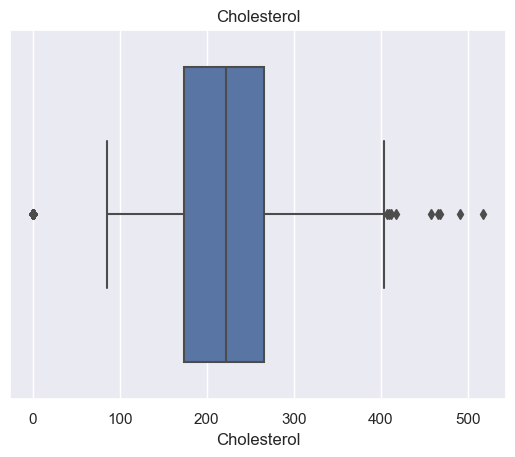

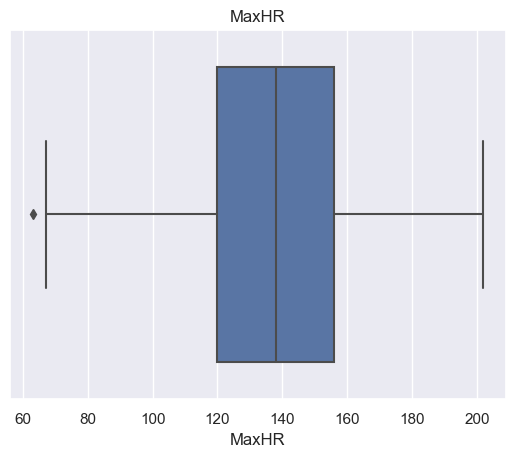

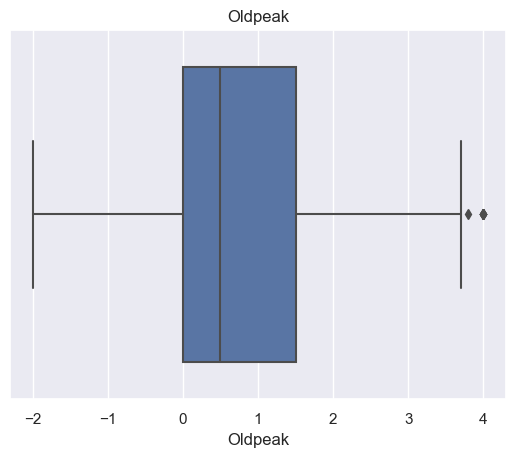

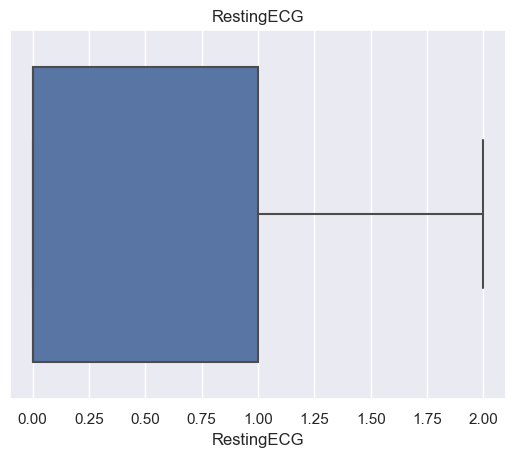

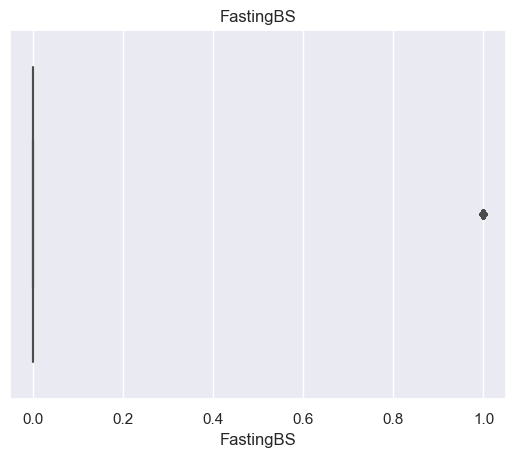

In [69]:
bxp = ['Cholesterol','MaxHR','Oldpeak','RestingECG','FastingBS']
for i in bxp:
    sns.boxplot(x=i,data=df1)
    plt.title(i)
    plt.show()

In [157]:
df1.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG',
       'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'z_score_Cholesterol', 'z_score_MaxHR', 'z_score_Oldpeak',
       'z_score_RestingECG', 'z_score_FastingBS'],
      dtype='object')

In [158]:
df1.drop(['z_score_Cholesterol', 'z_score_MaxHR', 'z_score_Oldpeak',
       'z_score_RestingECG', 'z_score_FastingBS'],axis=1,inplace=True)
df1.head()

Age  Sex  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0   40    0        140          289          0           0    172   
1   49    1        160          180          0           0    156   
2   37    0        130          283          0           2     98   
3   48    1        138          214          0           0    108   
4   54    0        150          195          0           0    122   

   ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  ChestPainType_ATA  \
0               0      0.0         1             0                  1   
1               0      1.0         0             1                  0   
2               0      0.0         1             0                  1   
3               1      1.5         0             1                  0   
4               0      0.0         1             0                  0   

   ChestPainType_NAP  ChestPainType_TA  
0                  0                 0  
1                  1                 0  
2                  0                 0  
3                  0                 0  
4                  1                 0

In [159]:
df1.shape

(907, 14)

In [164]:
X = df1.drop('HeartDisease',axis=1)
y = df1['HeartDisease']

In [165]:
from sklearn.preprocessing import StandardScaler

In [166]:
scaler = StandardScaler()
x_scale = scaler.fit_transform(X)
x_scale

array([[-1.43243691, -0.51648792,  0.41282475, ...,  2.05979964,
        -0.53528013, -0.22848233],
       [-0.47853069,  1.93615369,  1.49578079, ..., -0.48548411,
         1.86818067, -0.22848233],
       [-1.75040565, -0.51648792, -0.12865327, ...,  2.05979964,
        -0.53528013, -0.22848233],
       ...,
       [ 0.36938596, -0.51648792, -0.12865327, ..., -0.48548411,
        -0.53528013, -0.22848233],
       [ 0.36938596,  1.93615369, -0.12865327, ...,  2.05979964,
        -0.53528013, -0.22848233],
       [-1.64441607, -0.51648792,  0.30452915, ..., -0.48548411,
         1.86818067, -0.22848233]])

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train, X_test, y_train, y_test = train_test_split(x_scale,y,test_size=0.2)

In [169]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [170]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [171]:
svc.score(X_test,y_test)

0.8571428571428571

In [201]:
bag = BaggingClassifier(estimator=SVC(),n_estimators=200)
bag.fit(X_train,y_train)

BaggingClassifier(estimator=SVC(), n_estimators=200)

In [202]:
bag.score(X_test,y_test)

0.8516483516483516

In [190]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [191]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [192]:
dt.score(X_test,y_test)

0.7857142857142857

In [199]:
bag = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=200)
bag.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=200)

In [200]:
bag.score(X_test,y_test)

0.8516483516483516